In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
# import seaborn as sns
from pathlib import Path
import pandas_datareader as web
import requests
from dotenv import load_dotenv
import os
import pprint

In [2]:
# Read the Historical financial Data
p = web.get_data_yahoo(['^GSPC','CL=F','BTC-USD'], '10/31/2017', interval='d')
p = p.iloc[:, [0,1,2]]
p

Attributes    Adj Close                         
Symbols           ^GSPC       CL=F       BTC-USD
Date                                            
2017-10-31  2575.260010  54.380001   6468.399902
2017-11-01  2579.360107  54.299999   6767.310059
2017-11-02  2579.850098  54.540001   7078.500000
2017-11-03  2587.840088  55.639999   7207.759766
2017-11-04          NaN        NaN   7379.950195
...                 ...        ...           ...
2022-11-11  3992.929932  88.959999  17034.292969
2022-11-12          NaN        NaN  16799.185547
2022-11-13          NaN        NaN  16353.365234
2022-11-14  3957.250000  85.870003  16618.199219
2022-11-15          NaN  85.360001  16760.162109

[1842 rows x 3 columns]

In [3]:
#Count nulls
p.isnull().sum()

Attributes  Symbols
Adj Close   ^GSPC      573
            CL=F       570
            BTC-USD      0
dtype: int64

In [4]:
# Drop nulls
p.dropna(inplace=True)
p.isnull().sum()

Attributes  Symbols
Adj Close   ^GSPC      0
            CL=F       0
            BTC-USD    0
dtype: int64

In [5]:
# Reading Weather Data
weather_data_path = Path('./weather_data_4years.csv')
weather_df = pd.read_csv(weather_data_path, index_col="Date", infer_datetime_format=True, parse_dates=True)
weather_df.head()

,High_Temp,Low_Temp
Date,,
2018-10-31,17.5,7.3
2018-11-01,19.9,13.3
2018-11-02,20.4,17.6
2018-11-03,18.9,10.6
2018-11-04,13.5,7.6


In [6]:
# Add  Average Temp 
col = weather_df.loc[:,"High_Temp":"Low_Temp" ]
weather_df['Average_Temp'] = col.mean(axis=1)
# new_weather_df = weather_df[["High_Temp","Low_Temp"]].mean()
weather_df.head()


,High_Temp,Low_Temp,Average_Temp
Date,,,
2018-10-31,17.5,7.3,12.40
2018-11-01,19.9,13.3,16.60
2018-11-02,20.4,17.6,19.00
2018-11-03,18.9,10.6,14.75
2018-11-04,13.5,7.6,10.55


In [7]:
weather_df.dtypes

High_Temp       float64
Low_Temp        float64
Average_Temp    float64
dtype: object

In [8]:
p_returns = p.pct_change(fill_method="ffill")
p_returns.head()

Attributes Adj Close                    
Symbols        ^GSPC      CL=F   BTC-USD
Date                                    
2017-10-31       NaN       NaN       NaN
2017-11-01  0.001592 -0.001471  0.046211
2017-11-02  0.000190  0.004420  0.045984
2017-11-03  0.003097  0.020169  0.018261
2017-11-06  0.001271  0.030733 -0.025667

In [9]:
p_returns.dropna(inplace=True)
p_returns.isnull().sum()

Attributes  Symbols
Adj Close   ^GSPC      0
            CL=F       0
            BTC-USD    0
dtype: int64

In [12]:
p_returns.columns = [' '.join(col).strip() for col in p.columns.values]
columns = ["sp_500", "WTI", "BTC"]
p_returns.columns = columns
p_returns

,sp_500,WTI,BTC
Date,,,
2017-11-01,0.001592,-0.001471,0.046211
2017-11-02,0.000190,0.004420,0.045984
2017-11-03,0.003097,0.020169,0.018261
2017-11-06,0.001271,0.030733,-0.025667
2017-11-07,-0.000189,-0.002615,0.017318
...,...,...,...
2022-11-08,0.005598,-0.031376,-0.100061
2022-11-09,-0.020778,-0.034642,-0.143490
2022-11-10,0.055434,0.007457,0.107425


In [13]:
# concate with weather data
commined_weather_df = pd.concat([p_returns, weather_df['Average_Temp'],], axis="columns", join="inner")
commined_weather_df.head()

,sp_500,WTI,BTC,Average_Temp
Date,,,,
2018-10-31,0.010851,-0.013146,-0.002630,12.40
2018-11-01,0.010558,-0.024805,0.009524,16.60
2018-11-02,-0.006317,-0.008636,0.001671,19.00
2018-11-05,0.005600,-0.000634,0.004887,11.00
2018-11-06,0.006259,-0.014105,0.006441,12.95


<AxesSubplot:xlabel='Date'>

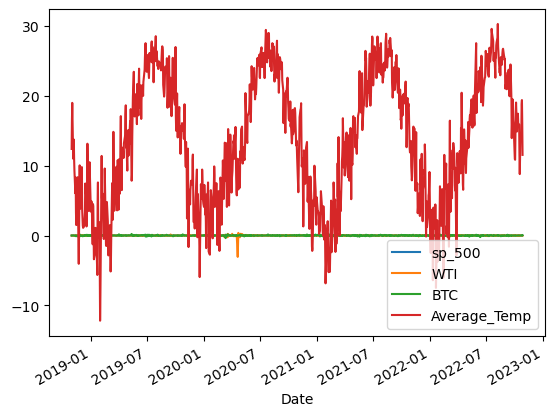

In [17]:
commined_weather_df.plot()

<function matplotlib.pyplot.show(close=None, block=None)>

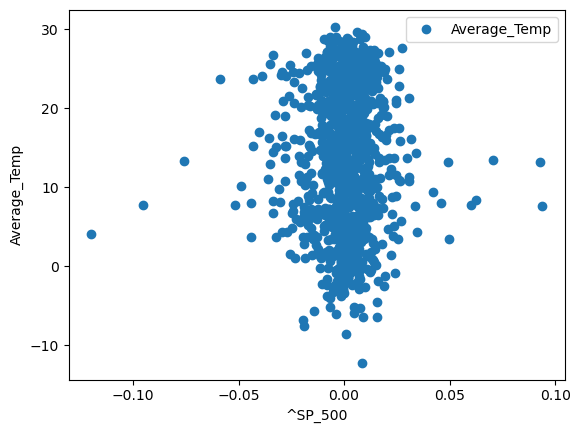

In [19]:
import matplotlib.pyplot as plt
commined_weather_df.plot(x='sp_500', y= 'Average_Temp', style= 'o')
plt.xlabel ('^SP_500')
plt.ylabel ('Average_Temp')
plt.show
